## Face detection
https://deepstackpython.readthedocs.io/en/latest/facedetection.html

In [1]:
import requests
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline

IP = "localhost"
PORT = "5000"

In [2]:
img_file = "family.jpg"

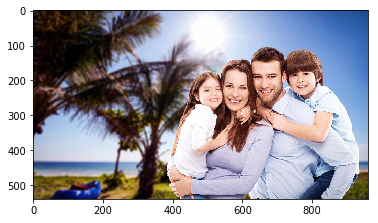

In [3]:
image = Image.open(img_file).convert("RGB")
plt.imshow(image);

Now post the data to Deepstack

In [4]:
image_data = open(img_file,"rb").read()
response = requests.post(f"http://{IP}:{PORT}/v1/vision/face", files={"image":image_data}).json()

In [5]:
response

{'success': True,
 'predictions': [{'confidence': 99,
   'gender': 'female',
   'y_min': 174,
   'x_min': 534,
   'y_max': 303,
   'x_max': 629},
  {'confidence': 66,
   'gender': 'male',
   'y_min': 146,
   'x_min': 616,
   'y_max': 275,
   'x_max': 711},
  {'confidence': 99,
   'gender': 'male',
   'y_min': 147,
   'x_min': 729,
   'y_max': 259,
   'x_max': 811},
  {'confidence': 99,
   'gender': 'female',
   'y_min': 190,
   'x_min': 471,
   'y_max': 290,
   'x_max': 549}]}

In [6]:
faces_detected = len(response["predictions"])
faces_detected

4

We can now save the faces:

In [7]:
i = 0
for face in response["predictions"]:
    y_max = int(face["y_max"])
    y_min = int(face["y_min"])
    x_max = int(face["x_max"])
    x_min = int(face["x_min"])
    cropped = image.crop((x_min,y_min,x_max,y_max))
    cropped.save(f"face_{i}.jpg")
    i += 1

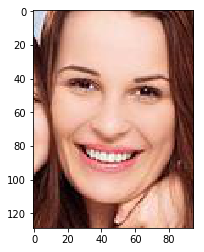

In [8]:
plt.imshow(Image.open("face_0.jpg").convert("RGB"))